<a href="https://colab.research.google.com/github/jagangirisaballa/iNeuron-Assignments/blob/master/Jagan_Combined_Assignment_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [1]:
import pandas as pd 
with open("/content/sample_data/nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

# The names of all the columns in the data.
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


### Check for null values 

In [2]:
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

### fillna with series mean

In [3]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

### Select only the numeric columns from the dataset

In [4]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

### Normalize all of the numeric columns

In [5]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

### Categorical Columns

In [6]:
nba_category = nba[['player', 'bref_team_id', 'season']]

In [7]:
nba = pd.concat([nba_category, nba_normalized], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

### Create the knn model. We will use regressor because we are predicting on continous values

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


### K=8, as it gives us the highest prediction score.

In [9]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [10]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


# Assignment 2

Problem Statement

In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.


In [11]:
pip install beautifulsoup4

In [12]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline


Fetching url and the html

In [13]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [14]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [15]:
print(soup.title)
print(soup.title.string)

<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor



## Extracting text

finding tokens


In [16]:
#text= soup.find('body').get_text(strip=True)     for body text
text = soup.get_text()
#tokens = [t for t in text.split()]   # words list 

# or by re

tokens = re.findall('\w+', text)

In [18]:
tokens[:15]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language']


converting tokens to lower case


In [19]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

Removing Stopwords

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]

Total including stopwords: 2768
Length after stopwords: 1900
Total removed stopwords: 868


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']


words Frequency distribution

    Total count
    unique(vocab)
    lexical diversity
    most common
    max count word
    A list of all hapax legomena (words that only appear one time in the corpus).
    counts.freq(): The percentage of the corpus for the given token.
    counts.plot(): Plot the frequencies of the n most commonly occuring words.



In [23]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 315 types and 1900 tokens for a lexical diversity of 6.032


In [24]:
print(counts.most_common(10))

[('php', 172), ('7', 86), ('release', 57), ('windows', 47), ('downloads', 46), ('source', 44), ('3', 38), ('version', 37), ('2020', 35), ('please', 35)]


In [25]:
print(counts.max())

php


In [26]:
print(counts.hapaxes()[0:10])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [27]:
counts.freq('php'), counts.freq('hypertext'),

(0.09052631578947369, 0.0005263157894736842)

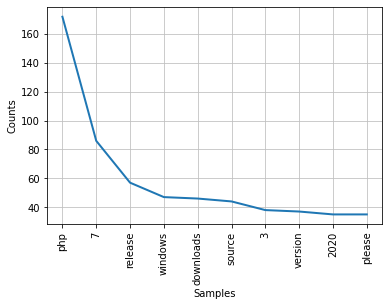

In [28]:
counts.plot(10, cumulative=False)

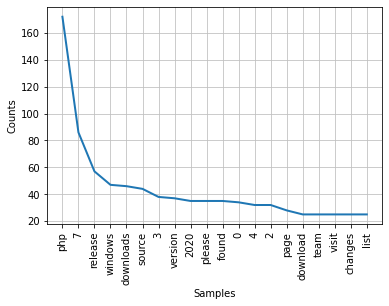

In [29]:
counts.plot(20,cumulative=False)

# Assignment 3
In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.

In [30]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

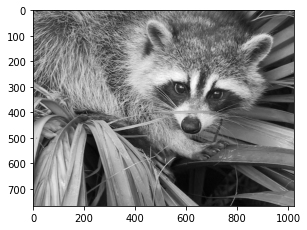

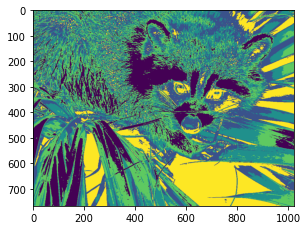

In [31]:
# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

#print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 
 
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

# Assignment 4
In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [32]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [33]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [35]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [36]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

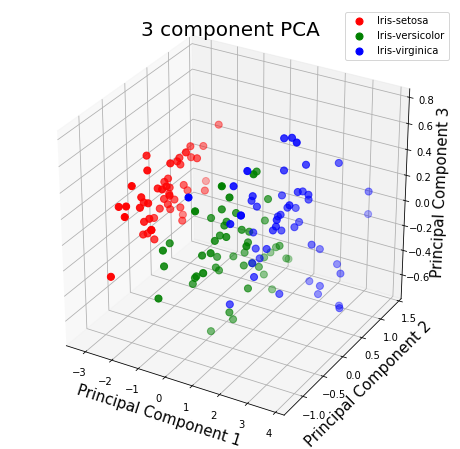

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# Assignment 5
In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
series = read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',delimiter=";" 
                  ,header=0, parse_dates=[0], index_col=0, squeeze=True)

Month
01-01    266.0
01-02    145.9
01-03    183.1
01-04    119.3
01-05    180.3
Name: Sales, dtype: float64


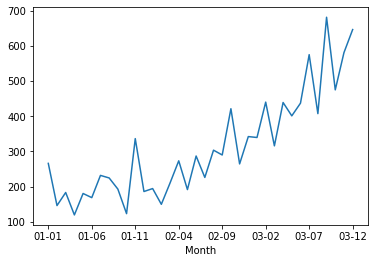

In [ ]:
print(series.head())
series.plot()
pyplot.show()

In [ ]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 25 Aug 2020   AIC                            406.340
Time:                        06:46:38   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

In [ ]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [ ]:
size = int(len(X) * 0.66)

In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
history = [x for x in train]

In [ ]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117705, expected=342.300000
predicted=306.512977, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154194, expected=315.900000
predicted=386.308770, expected=439.300000
predicted=356.081960, expected=401.300000
predicted=446.379501, expected=437.400000
predicted=394.737276, expected=575.500000
predicted=434.915504, expected=407.600000
predicted=507.923350, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343452, expected=646.900000
Test MSE: 6958.330


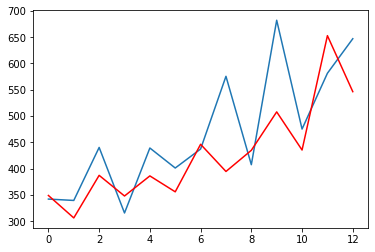

In [ ]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()